# K-means Clustering Algorithm

You will implement the K-means unsupervised learning algorithm.

Use the simplified Iris dataset provided to test your code.

Column 1: sepal length.
Column 2: sepal width

50 samples for setosa, 50 samples for versicolor


######Aishwarya Gupta 07700006172


(100, 2)


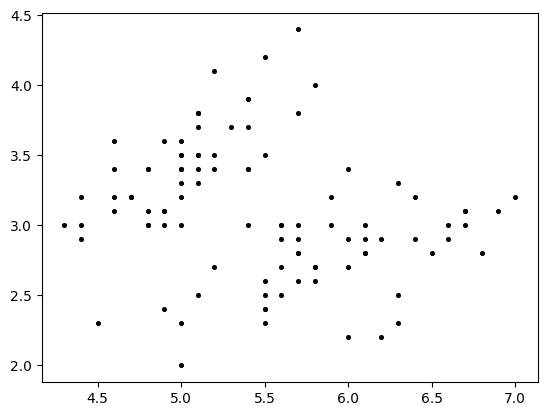

In [2]:
# Load dataset and plot it

%matplotlib inline
import numpy as np
import pandas as pd
from copy import deepcopy
from matplotlib import pyplot as plt

df = pd.read_csv('simple_iris_dataset.csv')

df1 = df['sepal_length'].values
df2 = df['sepal_width'].values
X = np.array(list(zip(df1, df2)))   # 100 x 2
plt.scatter(df1, df2, c='black', s=7)
print(X.shape)

In [7]:
## Your code goes here ...
def plot_clusters(X, clusters, centroids):
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    k,_ = np.shape(centroids)

    fig, ax = plt.subplots()
    for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        plt.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])

    plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=150, c='y')


[5.6 5.2]
[7.  3.2]
[[6.0266666 2.791111 ]
 [5.0163636 3.350909 ]]
Algorithm converges after 6 iterations


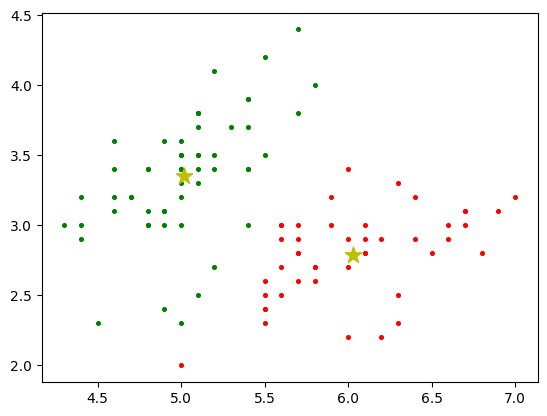

In [11]:
def find_clusters(X):
  # Initialize - take 2 random samples from data set
  # k = number of clusters to be formed
  k=2
  N = len(X)
  ctr1 = X[(np.random.randint(0,N)),:]
  ctr2 = X[(np.random.randint(0,N)),:]
  # Initialize the centroids
  centroids = np.array(list(zip(ctr1, ctr2)), dtype=np.float32)  # 2x2
  print(centroids[0])
  print(X[0])
  # Cluster indices
  clusters = np.zeros(len(X))
  MAX_ITR = 100
  # Loop till convergence, i.e., centroids do not change anymore or until raching MAX_ITR

  n = deepcopy(centroids)
  for itr in range(0,MAX_ITR):
        for i in range(0,len(X)):
            if np.linalg.norm(centroids[0]-X[i]) < np.linalg.norm(centroids[1]-X[i]):
                clusters[i] = 0
            else:
                clusters[i] = 1
        sum0 , sum1 = 0 , 0
        count0 , count1 = 0 , 0
        for i in range(0,len(clusters)):
            if clusters[i] == 0:
                sum0 = sum0 + X[i]
                count0 += 1
            elif clusters[i] == 1:
                sum1 = sum1 + X[i]
                count1 +=1

        n[0][0] = sum0[0]/count0
        n[0][1] = sum0[1]/count0
        n[1][0] = sum1[0]/count1
        n[1][1] = sum1[1]/count1
        if np.linalg.norm(centroids[0]-n[0]) == 0 and np.linalg.norm(centroids[1]-n[1]) == 0:
             break
        else:
             centroids[0] = n[0]
             centroids[1] = n[1]
  print(centroids)
  print('Algorithm converges after {} iterations'. format(itr))
  return clusters, centroids

clusters, centroids = find_clusters(X)
plot_clusters(X, clusters, centroids)